### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-11-25-bis/single/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241126$25^DAN_IHNY_SDS_WAX7_0.04$single.txt
20241126$25^DAN_IHNY_SDS_WAX7_phos$single.txt
20241126$25^DAN_IHNY_SDS_WAX7_0.01$single.txt
20241126$25^DAN_IHNY_SDS_WAX7_0.02$single.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, 
                         sep="\t", 
                         header=None)

        # clean the df
        if "single" in file:
            df = plotting.clean_single(df)
        elif "triple" in root:
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")

        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),EMOD,DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,76.0,4574.7,30.34,0.7898,5.238000e+09,5.238,0.000000e+00,0.010600,0.2637,21.66,0.8570,52.22,0.000031,54.417,0.8810,192.6,DAN_IHNY_SDS_WAX7_0.04
1,77.0,6146.8,30.14,0.9240,4.531000e+09,4.531,4.047000e-07,0.013430,0.2654,14.13,0.8626,41.10,0.000030,50.597,1.2460,202.7,DAN_IHNY_SDS_WAX7_0.04
2,78.0,4086.4,30.11,0.7192,5.300000e+09,5.300,0.000000e+00,0.007981,0.2657,19.33,0.8303,48.98,0.000024,45.101,0.8265,202.3,DAN_IHNY_SDS_WAX7_0.04
3,79.0,4521.3,30.08,0.7778,5.175000e+09,5.175,1.006000e-07,0.008871,0.2660,18.44,0.8311,49.15,0.000026,47.606,0.8545,189.0,DAN_IHNY_SDS_WAX7_0.04
4,80.0,3300.6,30.05,0.5824,5.302000e+09,5.302,0.000000e+00,0.006088,0.2329,20.96,0.8319,52.91,0.000022,43.694,0.6279,190.2,DAN_IHNY_SDS_WAX7_0.04


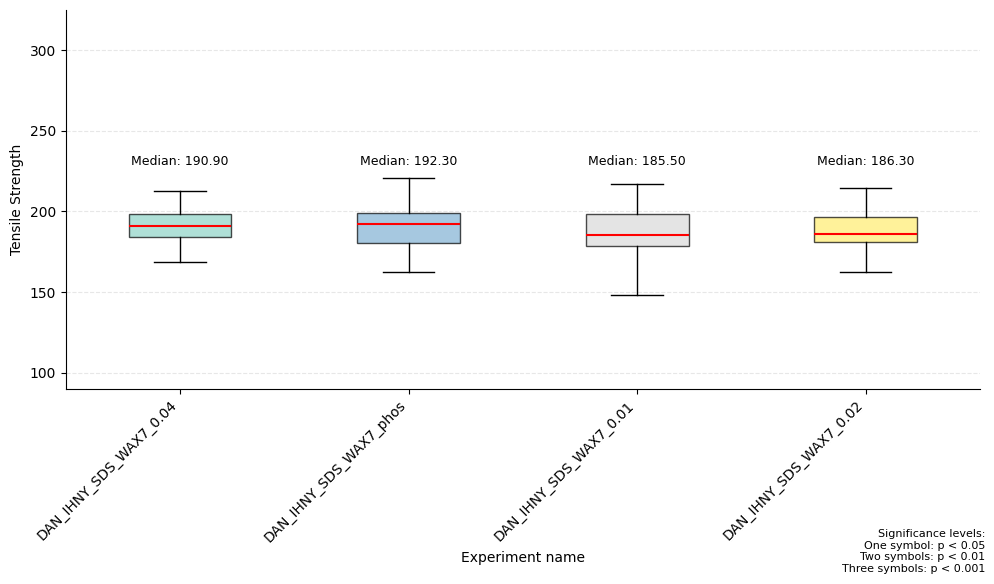

In [7]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [8]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")


Median TENSILE_STRENGTH for DAN_IHNY_SDS_WAX7_0.04: 190.89999999999998
Median TENSILE_STRENGTH for DAN_IHNY_SDS_WAX7_phos: 192.3
Median TENSILE_STRENGTH for DAN_IHNY_SDS_WAX7_0.01: 185.5
Median TENSILE_STRENGTH for DAN_IHNY_SDS_WAX7_0.02: 186.3


In [9]:
len(df_merged)

96

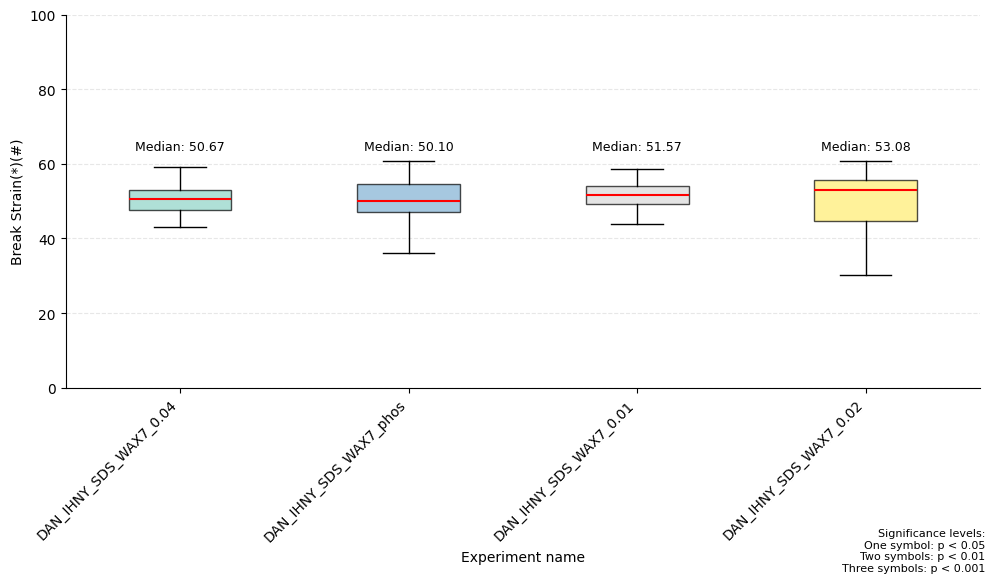

In [10]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_IHNY_SDS_WAX7_0.04 and DAN_IHNY_SDS_WAX7_phos: p = 0.0419


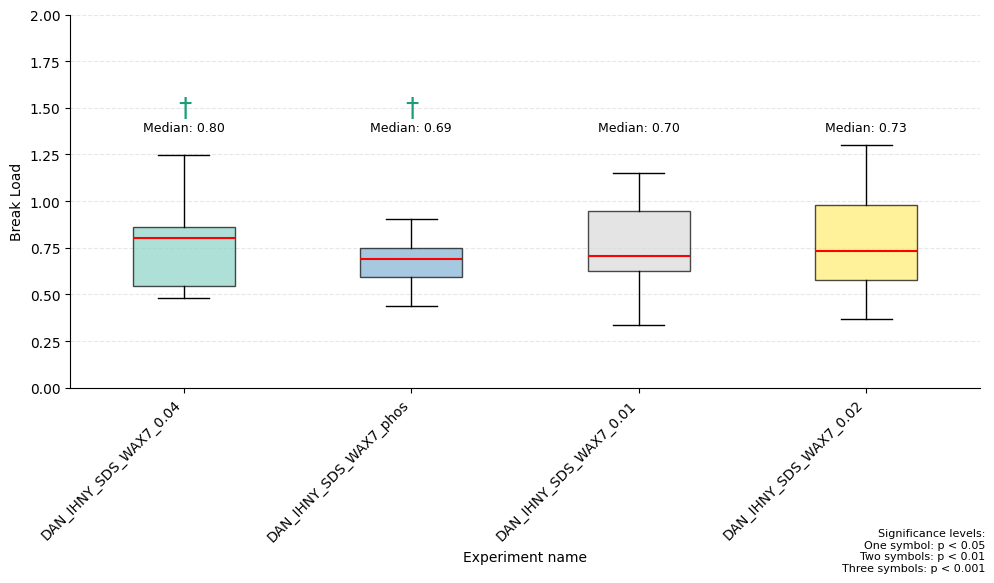

In [11]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()